In [1]:
from iris import *
import iris
from iris.analysis import * 
import iris.analysis
from numpy import *
from scipy.stats.mstats import * 
import iris.plot as iplt
import numpy as np
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import iris.analysis.trajectory
import iris.quickplot as qplt
import math
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# c = iris.load_cube('/Volumes/E-PEARSON/BIO_029/mercatorfreebiorys2v4_global_mean_*.nc','nppv')
c_pre2016 = iris.load_cube('/Users/ph290/Downloads/emma_nppv_arctic.nc')
c_post2015 = iris.load_cube('/Users/ph290/Downloads/emma_nppv_arctic.nc')

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [3]:
thicknesses = np.zeros(len(c_pre2016.coord('depth').points))
cumulative_thicknesses = np.zeros(len(c_pre2016.coord('depth').points))

In [4]:
i=0
thicknesses[i] = c_pre2016.coord('depth').points[i]*2.0
cumulative_thicknesses[i] = thicknesses[i]

for i in range(len(c_pre2016.coord('depth').points)):
    thicknesses[i] = (c_pre2016.coord('depth').points[i]-cumulative_thicknesses[i-1]) *2.0
    cumulative_thicknesses[i] = cumulative_thicknesses[i-1]+thicknesses[i]   

In [5]:
thicknesses

array([  1.01152003,   1.08867002,   1.13498378,   1.24221253,
         1.32594895,   1.47939754,   1.61957192,   1.84089065,
         2.06096864,   2.37375236,   2.69480729,   3.11415267,
         3.54148698,   4.05987334,   4.57264543,   5.15863585,
         5.72100282,   6.34274077,   6.93475556,   7.58964324,
         8.22804475,   8.95091033,   9.68562531,  10.53814483,
        11.43982148,  12.49958587,  13.65202546,  15.00877166,
        16.5078299 ,  18.26295257,  20.21724153])

In [6]:
my_shape = np.shape(c_pre2016)
thickness_4d = np.empty((my_shape[0],my_shape[1],my_shape[2],my_shape[3]))

In [7]:
for i,thickness_tmp in enumerate(thicknesses):
    print i
    thickness_4d[:,i,:,:] = thickness_tmp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [8]:
c_pre2016_column_total = c_pre2016.copy()

In [9]:
c_pre2016_column_total.data = thickness_4d*c_pre2016.data

In [10]:
c_pre2016_column_total_sum = c_pre2016_column_total.collapsed('depth',iris.analysis.SUM)

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'depth'.
  warnings.warn(msg.format(self.name()))


In [20]:
c_pre2016_column_total_sum *= 


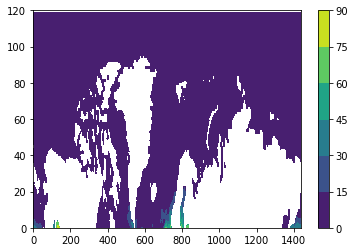

In [21]:
plt.contourf(c_pre2016_column_total_sum[0].data)
plt.colorbar()

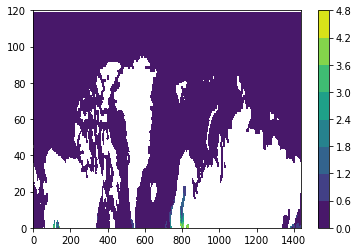

In [22]:
plt.contourf(c_pre2016[0][2].data)
plt.colorbar()

In [22]:
if not c_pre2016.coord('latitude').has_bounds(): 
    c_pre2016.coord('latitude').guess_bounds()
if not c_pre2016.coord('longitude').has_bounds(): 
    c_pre2016.coord('longitude').guess_bounds()

In [23]:
new_cube = c_pre2016[:,0,:,:].copy()
new_cube.data = c_pre2016_column_total_sum.data

In [24]:
if not new_cube.coord('latitude').has_bounds(): 
    new_cube.coord('latitude').guess_bounds()
if not new_cube.coord('longitude').has_bounds(): 
    new_cube.coord('longitude').guess_bounds()

In [45]:
new_cube

<iris 'Cube' of net_primary_production_of_biomass_expressed_as_carbon_per_unit_volume_in_sea_water / (mg m-3 day-1) (time: 276; latitude: 121; longitude: 1440)>

In [27]:
arctic_npp

<iris 'Cube' of net_primary_production_of_biomass_expressed_as_carbon_per_unit_volume_in_sea_water / (mg m-3 day-1) (time: 276; latitude: 101; longitude: 1440)>

In [4]:
# Subsetting the Arctic Region

west = -180
east = 180
south = 65 
north = 90

arctic_temporary = c_pre2016.intersection(longitude = (west, east))
arctic_npp = arctic_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Arctic Region

west = -180
east = 180
south = 65 
north = 90

temporary_cube1 = c_post2015.intersection(longitude = (west, east)) 
arctic_npp2 = temporary_cube1.intersection(latitude = (south, north))

In [40]:
year_1993 = arctic_npp[0:12]
year_1994 = arctic_npp[12:24]
year_1995 = arctic_npp[24:36]
year_1996 = arctic_npp[36:48]
year_1997 = arctic_npp[48:60]
year_1998 = arctic_npp[60:72]
year_1999 = arctic_npp[72:84]
year_2000 = arctic_npp[84:96]
year_2001 = arctic_npp[96:108]
year_2002 = arctic_npp[108:120]
year_2003 = arctic_npp[120:132]
year_2004 = arctic_npp[132:144]
year_2005 = arctic_npp[144:156]
year_2006 = arctic_npp[156:168]
year_2007 = arctic_npp[168:180]
year_2008 = arctic_npp[180:192]
year_2009 = arctic_npp[192:204]
year_2010 = arctic_npp[204:216]
year_2011 = arctic_npp[216:228]
year_2012 = arctic_npp[228:240]
year_2013 = arctic_npp[240:252]
year_2014 = arctic_npp[252:264]
year_2015 = arctic_npp[264:276]
#year_2016 = arctic_npp2[0:12]
#year_2017 = arctic_npp2[12:24]
#year_2018 = arctic_npp2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('ArcticAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('ArcticAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('ArcticAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('ArcticAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('ArcticAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('ArcticAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('ArcticAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('ArcticAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('ArcticAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('ArcticAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('ArcticAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('ArcticAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('ArcticAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('ArcticAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('ArcticAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('ArcticAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('ArcticAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('ArcticAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('ArcticAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('ArcticAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('ArcticAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('ArcticAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('ArcticAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('ArcticAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('ArcticAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('ArcticAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Greenland

In [46]:
# Subsetting the Greenland Region

west = -45 
east = 15 
south = 65 
north = 90

greenland_temporary = new_cube.intersection(longitude = (west, east))
greenland_npp = greenland_temporary.intersection(latitude = (south, north))

In [47]:
greenland_npp

<iris 'Cube' of net_primary_production_of_biomass_expressed_as_carbon_per_unit_volume_in_sea_water / (mg m-3 day-1) (time: 276; latitude: 121; longitude: 241)>

In [ ]:
# Subsetting the Greenland Region

west = -45 
east = 15 
south = 65 
north = 90

greenland_temporary_2 = new_cube_2.intersection(longitude = (west, east))
greenland_npp_2 = greenland_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = greenland_npp[0:12]
year_1994 = greenland_npp[12:24]
year_1995 = greenland_npp[24:36]
year_1996 = greenland_npp[36:48]
year_1997 = greenland_npp[48:60]
year_1998 = greenland_npp[60:72]
year_1999 = greenland_npp[72:84]
year_2000 = greenland_npp[84:96]
year_2001 = greenland_npp[96:108]
year_2002 = greenland_npp[108:120]
year_2003 = greenland_npp[120:132]
year_2004 = greenland_npp[132:144]
year_2005 = greenland_npp[144:156]
year_2006 = greenland_npp[156:168]
year_2007 = greenland_npp[168:180]
year_2008 = greenland_npp[180:192]
year_2009 = greenland_npp[192:204]
year_2010 = greenland_npp[204:216]
year_2011 = greenland_npp[216:228]
year_2012 = greenland_npp[228:240]
year_2013 = greenland_npp[240:252]
year_2014 = greenland_npp[252:264]
year_2015 = greenland_npp[264:276]
#year_2016 = greenland_npp_2[0:12]
#year_2017 = greenland_npp_2[12:24]
#year_2018 = greenland_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('GreenlandAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('GreenlandAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('GreenlandAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('GreenlandAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('GreenlandAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('GreenlandAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('GreenlandAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('GreenlandAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('GreenlandAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('GreenlandAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('GreenlandAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('GreenlandAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('GreenlandAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('GreenlandAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('GreenlandAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('GreenlandAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('GreenlandAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('GreenlandAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('GreenlandAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('GreenlandAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('GreenlandAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('GreenlandAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('GreenlandAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('GreenlandAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('GreenlandAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('GreenlandAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Barents

In [ ]:
# Subsetting the Barents Region

west = 15 
east = 55 
south = 65 
north = 90

barents_temporary = new_cube.intersection(longitude = (west, east))
barents_npp = barents_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Barents Region

west = 15 
east = 55 
south = 65 
north = 90

barents_temporary_2 = new_cube_2.intersection(longitude = (west, east))
barents_npp_2 = barents_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = barents_npp[0:12]
year_1994 = barents_npp[12:24]
year_1995 = barents_npp[24:36]
year_1996 = barents_npp[36:48]
year_1997 = barents_npp[48:60]
year_1998 = barents_npp[60:72]
year_1999 = barents_npp[72:84]
year_2000 = barents_npp[84:96]
year_2001 = barents_npp[96:108]
year_2002 = barents_npp[108:120]
year_2003 = barents_npp[120:132]
year_2004 = barents_npp[132:144]
year_2005 = barents_npp[144:156]
year_2006 = barents_npp[156:168]
year_2007 = barents_npp[168:180]
year_2008 = barents_npp[180:192]
year_2009 = barents_npp[192:204]
year_2010 = barents_npp[204:216]
year_2011 = barents_npp[216:228]
year_2012 = barents_npp[228:240]
year_2013 = barents_npp[240:252]
year_2014 = barents_npp[252:264]
year_2015 = barents_npp[264:276]
#year_2016 = barents_npp_2[0:12]
#year_2017 = barents_npp_2[12:24]
#year_2018 = barents_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('BarentsAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('BarentsAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('BarentsAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('BarentsAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('BarentsAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('BarentsAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('BarentsAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('BarentsAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('BarentsAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('BarentsAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('BarentsAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('BarentsAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('BarentsAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('BarentsAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('BarentsAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('BarentsAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('BarentsAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('BarentsAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('BarentsAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('BarentsAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('BarentsAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('BarentsAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('BarentsAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('BarentsAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('BarentsAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('BarentsAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Kara

In [ ]:
# Subsetting the Kara Region

west = -55
east = 105 
south = 65 
north = 90

kara_temporary = new_cube.intersection(longitude = (west, east))
kara_npp = kara_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Kara Region

west = -55
east = 105 
south = 65 
north = 90

kara_temporary_2 = new_cube_2.intersection(longitude = (west, east))
kara_npp_2 = kara_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = kara_npp[0:12]
year_1994 = kara_npp[12:24]
year_1995 = kara_npp[24:36]
year_1996 = kara_npp[36:48]
year_1997 = kara_npp[48:60]
year_1998 = kara_npp[60:72]
year_1999 = kara_npp[72:84]
year_2000 = kara_npp[84:96]
year_2001 = kara_npp[96:108]
year_2002 = kara_npp[108:120]
year_2003 = kara_npp[120:132]
year_2004 = kara_npp[132:144]
year_2005 = kara_npp[144:156]
year_2006 = kara_npp[156:168]
year_2007 = kara_npp[168:180]
year_2008 = kara_npp[180:192]
year_2009 = kara_npp[192:204]
year_2010 = kara_npp[204:216]
year_2011 = kara_npp[216:228]
year_2012 = kara_npp[228:240]
year_2013 = kara_npp[240:252]
year_2014 = kara_npp[252:264]
year_2015 = kara_npp[264:276]
#year_2016 = kara_npp_2[0:12]
#year_2017 = kara_npp_2[12:24]
#year_2018 = kara_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('KaraAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('KaraAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('KaraAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('KaraAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('KaraAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('KaraAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('KaraAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('KaraAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('KaraAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('KaraAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('KaraAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('KaraAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('KaraAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('KaraAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('KaraAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('KaraAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('KaraAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('KaraAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('KaraAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('KaraAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('KaraAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('KaraAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('KaraAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('KaraAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('KaraAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('KaraAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Laptev

In [ ]:
# Subsetting the Laptev Region

west = 105
east = 150 
south = 65 
north = 90

laptev_temporary = new_cube.intersection(longitude = (west, east))
laptev_npp = laptev_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Laptev Region

west = 105
east = 150 
south = 65 
north = 90

laptev_temporary_2 = new_cube_2.intersection(longitude = (west, east))
laptev_npp_2 = laptev_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = laptev_npp[0:12]
year_1994 = laptev_npp[12:24]
year_1995 = laptev_npp[24:36]
year_1996 = laptev_npp[36:48]
year_1997 = laptev_npp[48:60]
year_1998 = laptev_npp[60:72]
year_1999 = laptev_npp[72:84]
year_2000 = laptev_npp[84:96]
year_2001 = laptev_npp[96:108]
year_2002 = laptev_npp[108:120]
year_2003 = laptev_npp[120:132]
year_2004 = laptev_npp[132:144]
year_2005 = laptev_npp[144:156]
year_2006 = laptev_npp[156:168]
year_2007 = laptev_npp[168:180]
year_2008 = laptev_npp[180:192]
year_2009 = laptev_npp[192:204]
year_2010 = laptev_npp[204:216]
year_2011 = laptev_npp[216:228]
year_2012 = laptev_npp[228:240]
year_2013 = laptev_npp[240:252]
year_2014 = laptev_npp[252:264]
year_2015 = laptev_npp[264:276]
#year_2016 = laptev_npp_2[0:12]
#year_2017 = laptev_npp_2[12:24]
#year_2018 = laptev_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('LaptevAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('LaptevAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('LaptevAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('LaptevAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('LaptevAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('LaptevAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('LaptevAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('LaptevAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('LaptevAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('LaptevAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('LaptevAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('LaptevAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('LaptevAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('LaptevAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('LaptevAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('LaptevAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('LaptevAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('LaptevAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('LaptevAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('LaptevAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('LaptevAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('LaptevAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('LaptevAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('LaptevAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('LaptevAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('LaptevAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Siberian

In [ ]:
# Subsetting the Siberian Region

west = 150
east = 180 
south = 65 
north = 90

siberian_temporary = new_cube.intersection(longitude = (west, east))
siberian_npp = siberian_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Siberian Region

west = 150
east = 180 
south = 65 
north = 90

siberian_temporary_2 = new_cube_2.intersection(longitude = (west, east))
siberian_npp_2 = siberian_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = siberian_npp[0:12]
year_1994 = siberian_npp[12:24]
year_1995 = siberian_npp[24:36]
year_1996 = siberian_npp[36:48]
year_1997 = siberian_npp[48:60]
year_1998 = siberian_npp[60:72]
year_1999 = siberian_npp[72:84]
year_2000 = siberian_npp[84:96]
year_2001 = siberian_npp[96:108]
year_2002 = siberian_npp[108:120]
year_2003 = siberian_npp[120:132]
year_2004 = siberian_npp[132:144]
year_2005 = siberian_npp[144:156]
year_2006 = siberian_npp[156:168]
year_2007 = siberian_npp[168:180]
year_2008 = siberian_npp[180:192]
year_2009 = siberian_npp[192:204]
year_2010 = siberian_npp[204:216]
year_2011 = siberian_npp[216:228]
year_2012 = siberian_npp[228:240]
year_2013 = siberian_npp[240:252]
year_2014 = siberian_npp[252:264]
year_2015 = siberian_npp[264:276]
#year_2016 = siberian_npp_2[0:12]
#year_2017 = siberian_npp_2[12:24]
#year_2018 = siberian_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('SiberianAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('SiberianAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('SiberianAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('SiberianAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('SiberianAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('SiberianAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('SiberianAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('SiberianAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('SiberianAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('SiberianAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('SiberianAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('SiberianAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('SiberianAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('SiberianAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('SiberianAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('SiberianAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('SiberianAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('SiberianAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('SiberianAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('SiberianAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('SiberianAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('SiberianAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('SiberianAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('SiberianAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('SiberianAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('SiberianAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Chukchi

In [ ]:
# Subsetting the Chukchi Region

west = -180 
east = -160 
south = 65 
north = 90

chukchi_temporary = new_cube.intersection(longitude = (west, east))
chukchi_npp = chukchi_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Chukchi Region

west = -180 
east = -160 
south = 65 
north = 90

chukchi_temporary_2 = new_cube_2.intersection(longitude = (west, east))
chukchi_npp_2 = chukchi_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = chukchi_npp[0:12]
year_1994 = chukchi_npp[12:24]
year_1995 = chukchi_npp[24:36]
year_1996 = chukchi_npp[36:48]
year_1997 = chukchi_npp[48:60]
year_1998 = chukchi_npp[60:72]
year_1999 = chukchi_npp[72:84]
year_2000 = chukchi_npp[84:96]
year_2001 = chukchi_npp[96:108]
year_2002 = chukchi_npp[108:120]
year_2003 = chukchi_npp[120:132]
year_2004 = chukchi_npp[132:144]
year_2005 = chukchi_npp[144:156]
year_2006 = chukchi_npp[156:168]
year_2007 = chukchi_npp[168:180]
year_2008 = chukchi_npp[180:192]
year_2009 = chukchi_npp[192:204]
year_2010 = chukchi_npp[204:216]
year_2011 = chukchi_npp[216:228]
year_2012 = chukchi_npp[228:240]
year_2013 = chukchi_npp[240:252]
year_2014 = chukchi_npp[252:264]
year_2015 = chukchi_npp[264:276]
#year_2016 = chukchi_npp_2[0:12]
#year_2017 = chukchi_npp_2[12:24]
#year_2018 = chukchi_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('ChukchiAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('ChukchiAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('ChukchiAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('ChukchiAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('ChukchiAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('ChukchiAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('ChukchiAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('ChukchiAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('ChukchiAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('ChukchiAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('ChukchiAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('ChukchiAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('ChukchiAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('ChukchiAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('ChukchiAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('ChukchiAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('ChukchiAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('ChukchiAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('ChukchiAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('ChukchiAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('ChukchiAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('ChukchiAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('ChukchiAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('ChukchiAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('ChukchiAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('ChukchiAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Beaufort

In [ ]:
# Subsetting the Beaufort Region

west = -160
east = -100 
south = 65 
north = 90

beaufort_temporary = new_cube.intersection(longitude = (west, east))
beaufort_npp = beaufort_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Beaufort Region

west = -160
east = -100 
south = 65 
north = 90

beaufort_temporary_2 = new_cube_2.intersection(longitude = (west, east))
beaufort_npp_2 = beaufort_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = beaufort_npp[0:12]
year_1994 = beaufort_npp[12:24]
year_1995 = beaufort_npp[24:36]
year_1996 = beaufort_npp[36:48]
year_1997 = beaufort_npp[48:60]
year_1998 = beaufort_npp[60:72]
year_1999 = beaufort_npp[72:84]
year_2000 = beaufort_npp[84:96]
year_2001 = beaufort_npp[96:108]
year_2002 = beaufort_npp[108:120]
year_2003 = beaufort_npp[120:132]
year_2004 = beaufort_npp[132:144]
year_2005 = beaufort_npp[144:156]
year_2006 = beaufort_npp[156:168]
year_2007 = beaufort_npp[168:180]
year_2008 = beaufort_npp[180:192]
year_2009 = beaufort_npp[192:204]
year_2010 = beaufort_npp[204:216]
year_2011 = beaufort_npp[216:228]
year_2012 = beaufort_npp[228:240]
year_2013 = beaufort_npp[240:252]
year_2014 = beaufort_npp[252:264]
year_2015 = beaufort_npp[264:276]
#year_2016 = beaufort_npp_2[0:12]
#year_2017 = beaufort_npp_2[12:24]
#year_2018 = beaufort_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('BeaufortAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('BeaufortAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('BeaufortAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('BeaufortAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('BeaufortAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('BeaufortAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('BeaufortAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('BeaufortAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('BeaufortAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('BeaufortAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('BeaufortAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('BeaufortAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('BeaufortAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('BeaufortAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('BeaufortAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('BeaufortAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('BeaufortAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('BeaufortAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('BeaufortAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('BeaufortAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('BeaufortAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('BeaufortAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('BeaufortAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('BeaufortAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('BeaufortAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('BeaufortAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()

Baffin

In [ ]:
# Subsetting the Baffin Region

west = -100
east = -45 
south = 65 
north = 90

baffin_temporary = new_cube.intersection(longitude = (west, east))
baffin_npp = baffin_temporary.intersection(latitude = (south, north))

In [ ]:
# Subsetting the Baffin Region

west = -100
east = -45 
south = 65 
north = 90

baffin_temporary_2 = new_cube_2.intersection(longitude = (west, east))
baffin_npp_2 = baffin_temporary_2.intersection(latitude = (south, north))

In [40]:
year_1993 = baffin_npp[0:12]
year_1994 = baffin_npp[12:24]
year_1995 = baffin_npp[24:36]
year_1996 = baffin_npp[36:48]
year_1997 = baffin_npp[48:60]
year_1998 = baffin_npp[60:72]
year_1999 = baffin_npp[72:84]
year_2000 = baffin_npp[84:96]
year_2001 = baffin_npp[96:108]
year_2002 = baffin_npp[108:120]
year_2003 = baffin_npp[120:132]
year_2004 = baffin_npp[132:144]
year_2005 = baffin_npp[144:156]
year_2006 = baffin_npp[156:168]
year_2007 = baffin_npp[168:180]
year_2008 = baffin_npp[180:192]
year_2009 = baffin_npp[192:204]
year_2010 = baffin_npp[204:216]
year_2011 = baffin_npp[216:228]
year_2012 = baffin_npp[228:240]
year_2013 = baffin_npp[240:252]
year_2014 = baffin_npp[252:264]
year_2015 = baffin_npp[264:276]
#year_2016 = baffin_npp_2[0:12]
#year_2017 = baffin_npp_2[12:24]
#year_2018 = baffin_npp_2[24:36]

In [41]:
if not year_1993.coord('latitude').has_bounds(): 
    year_1993.coord('latitude').guess_bounds()
if not year_1993.coord('longitude').has_bounds(): 
    year_1993.coord('longitude').guess_bounds()
    
if not year_1994.coord('latitude').has_bounds(): 
    year_1994.coord('latitude').guess_bounds()
if not year_1994.coord('longitude').has_bounds(): 
    year_1994.coord('longitude').guess_bounds()
    
if not year_1995.coord('latitude').has_bounds(): 
    year_1995.coord('latitude').guess_bounds()
if not year_1995.coord('longitude').has_bounds(): 
    year_1995.coord('longitude').guess_bounds()
    
if not year_1996.coord('latitude').has_bounds(): 
    year_1996.coord('latitude').guess_bounds()
if not year_1996.coord('longitude').has_bounds(): 
    year_1996.coord('longitude').guess_bounds()
    
if not year_1997.coord('latitude').has_bounds(): 
    year_1997.coord('latitude').guess_bounds()
if not year_1997.coord('longitude').has_bounds(): 
    year_1997.coord('longitude').guess_bounds()
    
if not year_1998.coord('latitude').has_bounds(): 
    year_1998.coord('latitude').guess_bounds()
if not year_1998.coord('longitude').has_bounds(): 
    year_1998.coord('longitude').guess_bounds()
    
if not year_1999.coord('latitude').has_bounds(): 
    year_1999.coord('latitude').guess_bounds()
if not year_1999.coord('longitude').has_bounds(): 
    year_1999.coord('longitude').guess_bounds()
    
if not year_2000.coord('latitude').has_bounds(): 
    year_2000.coord('latitude').guess_bounds()
if not year_2000.coord('longitude').has_bounds(): 
    year_2000.coord('longitude').guess_bounds()
    
if not year_2001.coord('latitude').has_bounds(): 
    year_2001.coord('latitude').guess_bounds()
if not year_2001.coord('longitude').has_bounds(): 
    year_2001.coord('longitude').guess_bounds()
    
if not year_2002.coord('latitude').has_bounds(): 
    year_2002.coord('latitude').guess_bounds()
if not year_2002.coord('longitude').has_bounds(): 
    year_2002.coord('longitude').guess_bounds()
    
if not year_2003.coord('latitude').has_bounds(): 
    year_2003.coord('latitude').guess_bounds()
if not year_2003.coord('longitude').has_bounds(): 
    year_2003.coord('longitude').guess_bounds()

if not year_2004.coord('latitude').has_bounds(): 
    year_2004.coord('latitude').guess_bounds()
if not year_2004.coord('longitude').has_bounds(): 
    year_2004.coord('longitude').guess_bounds()
    
if not year_2005.coord('latitude').has_bounds(): 
    year_2005.coord('latitude').guess_bounds()
if not year_2005.coord('longitude').has_bounds(): 
    year_2005.coord('longitude').guess_bounds()
    
if not year_2006.coord('latitude').has_bounds(): 
    year_2006.coord('latitude').guess_bounds()
if not year_2006.coord('longitude').has_bounds(): 
    year_2006.coord('longitude').guess_bounds()
    
if not year_2007.coord('latitude').has_bounds(): 
    year_2007.coord('latitude').guess_bounds()
if not year_2007.coord('longitude').has_bounds(): 
    year_2007.coord('longitude').guess_bounds()
    
if not year_2008.coord('latitude').has_bounds(): 
    year_2008.coord('latitude').guess_bounds()
if not year_2008.coord('longitude').has_bounds(): 
    year_2008.coord('longitude').guess_bounds()

if not year_2009.coord('latitude').has_bounds(): 
    year_2009.coord('latitude').guess_bounds()
if not year_2009.coord('longitude').has_bounds(): 
    year_2009.coord('longitude').guess_bounds()

if not year_2010.coord('latitude').has_bounds(): 
    year_2010.coord('latitude').guess_bounds()
if not year_2010.coord('longitude').has_bounds(): 
    year_2010.coord('longitude').guess_bounds()
    
if not year_2011.coord('latitude').has_bounds(): 
    year_2011.coord('latitude').guess_bounds()
if not year_2011.coord('longitude').has_bounds(): 
    year_2011.coord('longitude').guess_bounds()
    
if not year_2012.coord('latitude').has_bounds(): 
    year_2012.coord('latitude').guess_bounds()
if not year_2012.coord('longitude').has_bounds(): 
    year_2012.coord('longitude').guess_bounds()
    
if not year_2013.coord('latitude').has_bounds(): 
    year_2013.coord('latitude').guess_bounds()
if not year_2013.coord('longitude').has_bounds(): 
    year_2013.coord('longitude').guess_bounds()
    
if not year_2014.coord('latitude').has_bounds(): 
    year_2014.coord('latitude').guess_bounds()
if not year_2014.coord('longitude').has_bounds(): 
    year_2014.coord('longitude').guess_bounds()
    
if not year_2015.coord('latitude').has_bounds(): 
    year_2015.coord('latitude').guess_bounds()
if not year_2015.coord('longitude').has_bounds(): 
    year_2015.coord('longitude').guess_bounds()
    
#if not year_2016.coord('latitude').has_bounds(): 
   # year_2016.coord('latitude').guess_bounds()
#if not year_2016.coord('longitude').has_bounds(): 
   # year_2016.coord('longitude').guess_bounds()
    
#if not year_2017.coord('latitude').has_bounds(): 
   # year_2017.coord('latitude').guess_bounds()
#if not year_2017.coord('longitude').has_bounds(): 
    #year_2017.coord('longitude').guess_bounds()
    
#if not year_2018.coord('latitude').has_bounds(): 
   # year_2018.coord('latitude').guess_bounds()
#if not year_2018.coord('longitude').has_bounds(): 
    #year_2018.coord('longitude').guess_bounds()
    
AverageNPP_1993 = []
grid_areas = iris.analysis.cartography.area_weights(year_1993)

AverageNPP_1994 = []
grid_areas = iris.analysis.cartography.area_weights(year_1994)

AverageNPP_1995 = []
grid_areas = iris.analysis.cartography.area_weights(year_1995)

AverageNPP_1996 = []
grid_areas = iris.analysis.cartography.area_weights(year_1996)

AverageNPP_1997 = []
grid_areas = iris.analysis.cartography.area_weights(year_1997)

AverageNPP_1998 = []
grid_areas = iris.analysis.cartography.area_weights(year_1998)

AverageNPP_1999 = []
grid_areas = iris.analysis.cartography.area_weights(year_1999)

AverageNPP_2000 = []
grid_areas = iris.analysis.cartography.area_weights(year_2000)

AverageNPP_2001 = []
grid_areas = iris.analysis.cartography.area_weights(year_2001)

AverageNPP_2002 = []
grid_areas = iris.analysis.cartography.area_weights(year_2002)

AverageNPP_2003 = []
grid_areas = iris.analysis.cartography.area_weights(year_2003)

AverageNPP_2004 = []
grid_areas = iris.analysis.cartography.area_weights(year_2004)

AverageNPP_2005 = []
grid_areas = iris.analysis.cartography.area_weights(year_2005)

AverageNPP_2006 = []
grid_areas = iris.analysis.cartography.area_weights(year_2006)

AverageNPP_2007 = []
grid_areas = iris.analysis.cartography.area_weights(year_2007)

AverageNPP_2008 = []
grid_areas = iris.analysis.cartography.area_weights(year_2008)

AverageNPP_2009 = []
grid_areas = iris.analysis.cartography.area_weights(year_2009)

AverageNPP_2010 = []
grid_areas = iris.analysis.cartography.area_weights(year_2010)

AverageNPP_2011 = []
grid_areas = iris.analysis.cartography.area_weights(year_2011)

AverageNPP_2012 = []
grid_areas = iris.analysis.cartography.area_weights(year_2012)

AverageNPP_2013 = []
grid_areas = iris.analysis.cartography.area_weights(year_2013)

AverageNPP_2014 = []
grid_areas = iris.analysis.cartography.area_weights(year_2014)

AverageNPP_2015 = []
grid_areas = iris.analysis.cartography.area_weights(year_2015)

#AverageNPP_2016 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2016)

#AverageNPP_2017 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2017)

#AverageNPP_2018 = []
#grid_areas = iris.analysis.cartography.area_weights(year_2018)


mean_net_primary_production_1993 = year_1993.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1994 = year_1994.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1995 = year_1995.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1996 = year_1996.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1997 = year_1997.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1998 = year_1998.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_1999 = year_1999.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2000 = year_2000.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2001 = year_2001.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2002 = year_2002.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2003 = year_2003.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2004 = year_2004.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2005 = year_2005.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2006 = year_2006.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2007 = year_2007.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2008 = year_2008.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2009 = year_2009.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2010 = year_2010.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2011 = year_2011.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2012 = year_2012.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2013 = year_2013.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2014 = year_2014.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
mean_net_primary_production_2015 = year_2015.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2016 = year_2016.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2017 = year_2017.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)
#mean_net_primary_production_2018 = year_2018.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights = grid_areas)

AverageNPP_1993.append(mean_net_primary_production_1993.data)
AverageNPP_1994.append(mean_net_primary_production_1994.data)
AverageNPP_1995.append(mean_net_primary_production_1995.data)
AverageNPP_1996.append(mean_net_primary_production_1996.data)
AverageNPP_1997.append(mean_net_primary_production_1997.data)
AverageNPP_1998.append(mean_net_primary_production_1998.data)
AverageNPP_1999.append(mean_net_primary_production_1999.data)
AverageNPP_2000.append(mean_net_primary_production_2000.data)
AverageNPP_2001.append(mean_net_primary_production_2001.data)
AverageNPP_2002.append(mean_net_primary_production_2002.data)
AverageNPP_2003.append(mean_net_primary_production_2003.data)
AverageNPP_2004.append(mean_net_primary_production_2004.data)
AverageNPP_2005.append(mean_net_primary_production_2005.data)
AverageNPP_2006.append(mean_net_primary_production_2006.data)
AverageNPP_2007.append(mean_net_primary_production_2007.data)
AverageNPP_2008.append(mean_net_primary_production_2008.data)
AverageNPP_2009.append(mean_net_primary_production_2009.data)
AverageNPP_2010.append(mean_net_primary_production_2010.data)
AverageNPP_2011.append(mean_net_primary_production_2011.data)
AverageNPP_2012.append(mean_net_primary_production_2012.data)
AverageNPP_2013.append(mean_net_primary_production_2013.data)
AverageNPP_2014.append(mean_net_primary_production_2014.data)
AverageNPP_2015.append(mean_net_primary_production_2015.data)
#AverageNPP_2016.append(mean_net_primary_production_2016.data)
#AverageNPP_2017.append(mean_net_primary_production_2017.data)
#AverageNPP_2018.append(mean_net_primary_production_2018.data)

import csv

with open('BaffinAverageNPP_1993_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1993)
    csvFile.close()
with open('BaffinAverageNPP_1994_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1994)
    csvFile.close()
with open('BaffinAverageNPP_1995_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1995)
    csvFile.close()
with open('BaffinAverageNPP_1996_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1996)
    csvFile.close()
with open('BaffinAverageNPP_1997_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1997)
    csvFile.close()
with open('BaffinAverageNPP_1998_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1998)
    csvFile.close()
with open('BaffinAverageNPP_1999_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_1999)
    csvFile.close()
with open('BaffinAverageNPP_2000_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2000)
    csvFile.close()
with open('BaffinAverageNPP_2001_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2001)
    csvFile.close()
with open('BaffinAverageNPP_2002_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2002)
    csvFile.close()
with open('BaffinAverageNPP_2003_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2003)
    csvFile.close()
with open('BaffinAverageNPP_2004_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2004)
    csvFile.close()
with open('BaffinAverageNPP_2005_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2005)
    csvFile.close()
with open('BaffinAverageNPP_2006_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2006)
    csvFile.close()
with open('BaffinAverageNPP_2007.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2007)
    csvFile.close()
with open('BaffinAverageNPP_2008_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2008)
    csvFile.close()
with open('BaffinAverageNPP_2009_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2009)
    csvFile.close()
with open('BaffinAverageNPP_2010_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2010)
    csvFile.close()
with open('BaffinAverageNPP_2011_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2011)
    csvFile.close()
with open('BaffinAverageNPP_2012_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2012)
    csvFile.close()
with open('BaffinAverageNPP_2013_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2013)
    csvFile.close()
with open('BaffinAverageNPP_2014_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2014)
    csvFile.close()
with open('BaffinAverageNPP_2015_2.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(AverageNPP_2015)
    csvFile.close()
#with open('BaffinAverageNPP_2016_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2016)
   # csvFile.close()
#with open('BaffinAverageNPP_2017_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2017)
   # csvFile.close()
#with open('BaffinAverageNPP_2018_2.csv', 'a') as csvFile:
   # writer = csv.writer(csvFile)
   # writer.writerow(AverageNPP_2018)
   # csvFile.close()